In [5]:
import os
os.chdir('/home/rm/ssd2/langcao/workspace/tablemaster')
!pwd

/home/rm/ssd2/langcao/workspace/tablemaster


In [6]:
import os
import sys
import json
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import tiktoken
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('./')
from evaluate.evaluator import eval_qa, eval_fact
from table_utils import format_table

In [31]:
plt.rcParams['font.family'] = 'Calibri'

methods = ['Textual Reasoning', 'Symbolic Reasoning', 'Text-guided Symbolic Reasoning']
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

color_mapping = {
    'Symbolic Reasoning': '#1f77b4',
    'Textual Reasoning': '#ff7f0e',
    'Text-guided Symbolic Reasoning': '#2ca02c'
}


In [32]:
results = {
    'Symbolic Reasoning': {
        'No Calculation Required': 0.6180,
        'Calculation Required': 0.4328,
        'Overall': 0.5032,
    },
    'Textual Reasoning': {
        'No Calculation Required': 0.7240,
        'Calculation Required': 0.5227,
        'Overall': 0.5992,
    },
    'Text-guided Symbolic Reasoning': {
        'No Calculation Required': 0.6665,
        'Calculation Required': 0.5910,
        'Overall': 0.6197,
    },
}

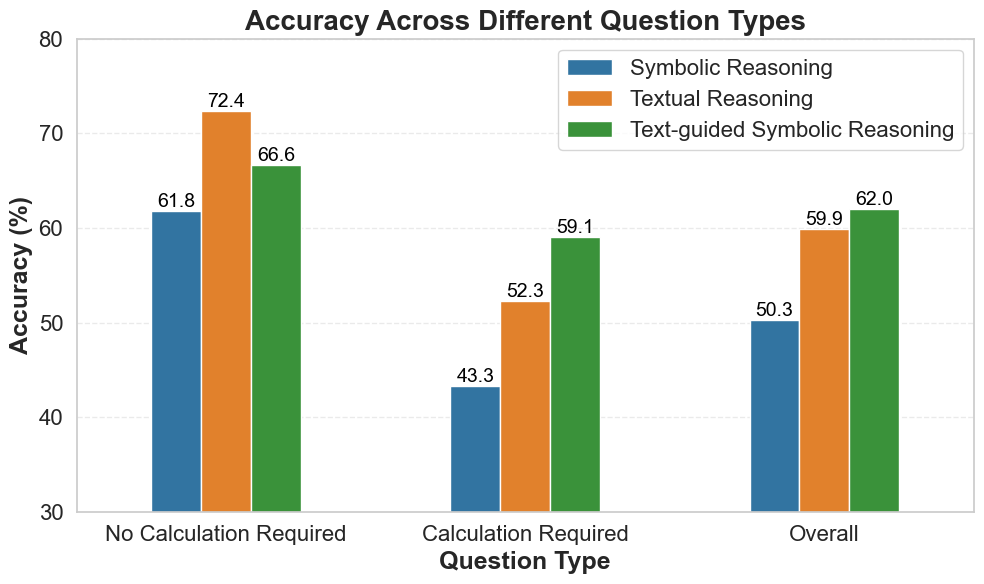

In [34]:
# Convert dictionary to DataFrame for Seaborn plotting
df = pd.DataFrame(results).reset_index().melt(id_vars='index', var_name='Method', value_name='Accuracy')
df.rename(columns={'index': 'Question Type'}, inplace=True)
df['Accuracy'] = df['Accuracy'] * 100

# Plot using Seaborn with updated aesthetics and improved transparency
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df, x="Question Type", y="Accuracy", hue="Method", ax=ax, palette=color_mapping, alpha=1, width=0.5)

# Annotate each bar with the corresponding accuracy value (without '%')
for container in ax.containers:
    plt.bar_label(container, fmt="%.1f", label_type="edge", fontsize=14, color="black")

# Customize plot with enhanced titles and labels
sns.set_theme(style="whitegrid")
plt.title("Accuracy Across Different Question Types", fontsize=20, fontweight='bold')
plt.xlabel("Question Type", fontsize=18, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=18, fontweight='bold')
plt.ylim(30, 80)  # Adjusted for the accuracy range
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show plot with tight layout
plt.tight_layout()
plt.savefig('figures/analysis/reason_analysis.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()